<a href="https://githubtocolab.com/geonextgis/geeagri/blob/main/docs/examples/timeseries_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

Uncomment the following line to install [geeagri](https://geonextgis.github.io/geeagri) if needed.

In [5]:
!pip install geeagri

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.0 MB/s eta 0:00:00


## Import libraries

In [6]:
import ee
import geemap
from geeagri.extract import (
    extract_timeseries_to_point,
    extract_timeseries_to_polygon,
    TimeseriesExtractor,
)

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "DeJavu Serif"
plt.rcParams["font.serif"] = "Times New Roman"

## Initialize a Map object
Authenticate and initialize Earth Engine. If it doesn't work, specify a project name

In [9]:
ee.Authenticate()
ee.Initialize(project='fifth-tangent-451221-f3')

Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

## Import region of interest

In [40]:
bbox = [33.5, 0.819663, 37.5258, 8.933287]
polygon = ee.Geometry.BBox(*bbox)
polygon_style = {"color": "red", "width": 1}
Map.addLayer(polygon, polygon_style, "Polygon")
Map.centerObject(polygon, 8)

lon, lat = 35.594102, 3.113772
point = ee.Geometry.Point([lon, lat])
Map.addLayer(point, {"color": "blue"}, "Point")

## Parallel export of timeseries for large sample sets with `TimeseriesExtractor`

In [41]:
era5_land = ee.ImageCollection("ECMWF/ERA5_LAND/DAILY_AGGR")

# Generate or load sample points
sample = (
    era5_land.first()
    .select("temperature_2m_min")
    .sample(
        region=polygon,
        scale=11132,  # ~11 km
        numPixels=100,  # number of samples
        seed=42,
        dropNulls=True,
        tileScale=16,
        geometries=True,
    )
)

# Convert samples to GeoDataFrame
sample_gdf = geemap.ee_to_gdf(sample)
sample_gdf["ID"] = sample_gdf.index
sample_gdf = sample_gdf[["ID", "geometry"]]

print(f"Sample size: {sample_gdf.shape[0]}")
sample_gdf.head()

Sample size: 100


ID                  geometry
0   0  POINT (33.60245 3.12961)
1   1   POINT (35.9055 5.79384)
2   2  POINT (34.80653 3.20886)
3   3  POINT (33.86554 4.28595)
4   4    POINT (34.804 5.41276)

In [42]:
# Extract timeseries in parallel for all samples
ts_extractor = TimeseriesExtractor(
    image_collection=era5_land,
    sample_gdf=sample_gdf,
    identifier="ID",
    out_dir="test",  # output directory
    selectors=[
        "temperature_2m_min",
        "temperature_2m_max",
        "total_precipitation_sum",
        "surface_solar_radiation_downwards_sum",
    ],
    scale=11132,
    num_processes=20,  # parallel processes
    start_date="2000-01-01",
    end_date="2010-01-01",
)

# Run extraction
ts_extractor.extract_timeseries()

Saved: test/0.csv
Saved: test/34.csv
Saved: test/26.csv
Saved: test/18.csv
Saved: test/20.csv
Saved: test/14.csv
Saved: test/6.csv
Saved: test/28.csv
Saved: test/22.csv
Saved: test/30.csv
Saved: test/24.csv
Saved: test/8.csv
Saved: test/2.csv
Saved: test/36.csv
Saved: test/4.csv
Saved: test/10.csv
Saved: test/12.csv
Saved: test/32.csv
Saved: test/16.csv
Saved: test/38.csv


Saved: test/1.csv
Saved: test/35.csv
Saved: test/5.csv
Saved: test/15.csv
Saved: test/23.csv
Saved: test/33.csv
Saved: test/13.csv
Saved: test/29.csv
Saved: test/31.csv
Saved: test/27.csv
Saved: test/11.csv
Saved: test/17.csv
Saved: test/25.csv


Saved: test/19.csv
Saved: test/3.csv
Saved: test/9.csv
Saved: test/39.csv
Saved: test/40.csv
Saved: test/37.csv
Saved: test/21.csv
Saved: test/42.csv
Saved: test/44.csv
Saved: test/52.csv
Saved: test/46.csv
Saved: test/56.csv
Saved: test/48.csv
Saved: test/62.csv
Saved: test/54.csv


Saved: test/41.csv
Saved: test/68.csv
Saved: test/64.csv
Saved: test/72.csv
Saved: test/70.csv
Saved: test/74.csv
Saved: test/7.csv
Saved: test/76.csv
Saved: test/43.csv


Saved: test/45.csv
Saved: test/53.csv


Saved: test/65.csv
Saved: test/69.csv
Saved: test/66.csv


Saved: test/63.csv
Saved: test/55.csv
Saved: test/49.csv
Saved: test/78.csv


Saved: test/75.csv
Saved: test/58.csv
Saved: test/82.csv
Saved: test/71.csv
Saved: test/77.csv
Saved: test/84.csv
Saved: test/86.csv
Saved: test/88.csv
Saved: test/50.csv
Saved: test/73.csv
Saved: test/92.csv
Saved: test/90.csv
Saved: test/60.csv
Saved: test/67.csv
Saved: test/59.csv
Saved: test/79.csv


Saved: test/94.csv
Saved: test/47.csv
Saved: test/83.csv
Saved: test/57.csv
Saved: test/98.csv
Saved: test/96.csv
Saved: test/89.csv
Saved: test/87.csv
Saved: test/61.csv
Saved: test/85.csv
Saved: test/93.csv
Saved: test/95.csv


Saved: test/97.csv
Saved: test/80.csv
Saved: test/91.csv
Saved: test/99.csv
Saved: test/81.csv
Saved: test/51.csv


## Export single timeseries from climate data (ERA5-Land Daily)

In [45]:
era5_land = ee.ImageCollection("ECMWF/ERA5_LAND/DAILY_AGGR")

era5_land_point_ts = extract_timeseries_to_point(
    lat=lat,
    lon=lon,
    image_collection=era5_land,
    start_date="2010-01-01",
    end_date="2015-01-01",
    band_names=[
        "temperature_2m_min",
        "temperature_2m_max",
        "total_precipitation_sum",
        "surface_solar_radiation_downwards_sum",
    ],
    scale=11132,
)

era5_land_polygon_ts = extract_timeseries_to_polygon(
    polygon=polygon,
    image_collection=era5_land,
    start_date="2010-01-01",
    end_date="2015-01-01",
    band_names=[
        "temperature_2m_min",
        "temperature_2m_max",
        "total_precipitation_sum",
        "surface_solar_radiation_downwards_sum",
    ],
    scale=11132,
    reducer="MEAN",
)

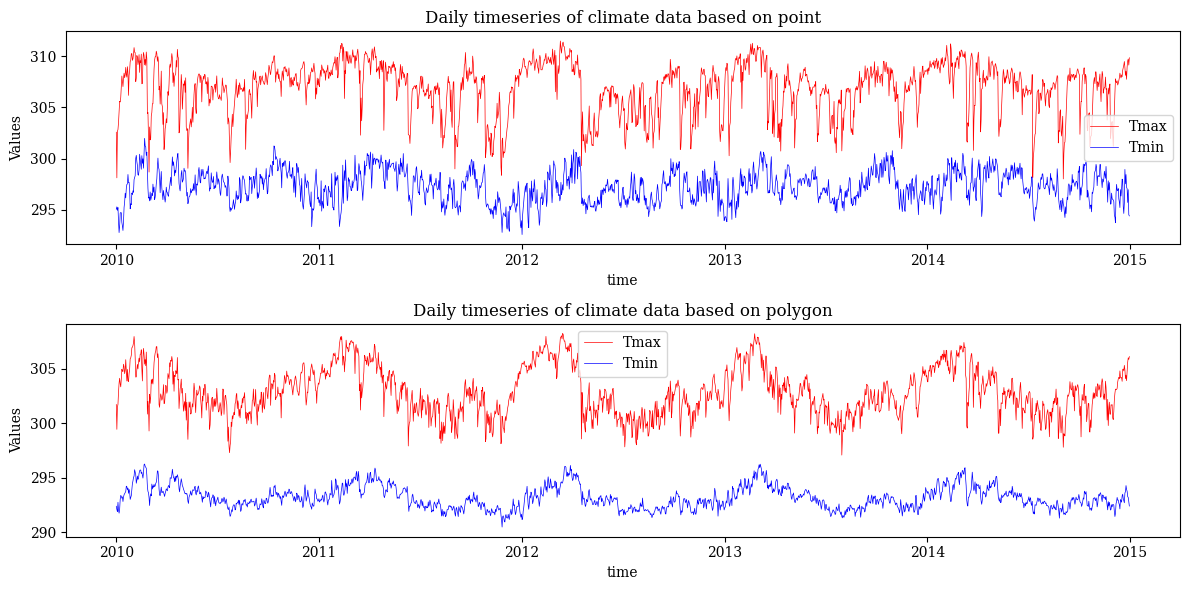

In [50]:
# Plot the data
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
axes = axes.flatten()

sns.lineplot(
    data=era5_land_point_ts,
    x="time",
    y="temperature_2m_max",
    c="r",
    linewidth=0.5,
    ax=axes[0],
    label="Tmax",
)
sns.lineplot(
    data=era5_land_point_ts,
    x="time",
    y="temperature_2m_min",
    c="b",
    linewidth=0.5,
    ax=axes[0],
    label="Tmin",
)
axes[0].set_ylabel("Values")
axes[0].legend()
axes[0].set_title("Daily timeseries of climate data based on point")

sns.lineplot(
    data=era5_land_polygon_ts,
    x="time",
    y="temperature_2m_max",
    c="r",
    linewidth=0.5,
    ax=axes[1],
    label="Tmax",
)
sns.lineplot(
    data=era5_land_polygon_ts,
    x="time",
    y="temperature_2m_min",
    c="b",
    linewidth=0.5,
    ax=axes[1],
    label="Tmin",
)
axes[1].set_ylabel("Values")
axes[1].legend()
axes[1].set_title("Daily timeseries of climate data based on polygon")

plt.tight_layout()
plt.show()

## Export single timeseries from NDVI data (MOD13Q1.061 Terra Vegetation Indices 16-Day)

In [47]:
modis_ndvi = ee.ImageCollection("MODIS/061/MOD13Q1")

modis_ndvi_point_ts = extract_timeseries_to_point(
    lat=lat,
    lon=lon,
    image_collection=modis_ndvi,
    start_date="2010-01-01",
    end_date="2015-01-01",
    band_names=["NDVI", "EVI"],
    scale=250,
)

modis_ndvi_polygon_ts = extract_timeseries_to_polygon(
    polygon=polygon,
    image_collection=modis_ndvi,
    start_date="2010-01-01",
    end_date="2015-01-01",
    band_names=["NDVI", "EVI"],
    scale=250,
    reducer="MEAN",
)

# Apply scale factors
modis_ndvi_point_ts[["NDVI", "EVI"]] = modis_ndvi_point_ts[["NDVI", "EVI"]] * 0.0001
modis_ndvi_polygon_ts[["NDVI", "EVI"]] = modis_ndvi_polygon_ts[["NDVI", "EVI"]] * 0.0001

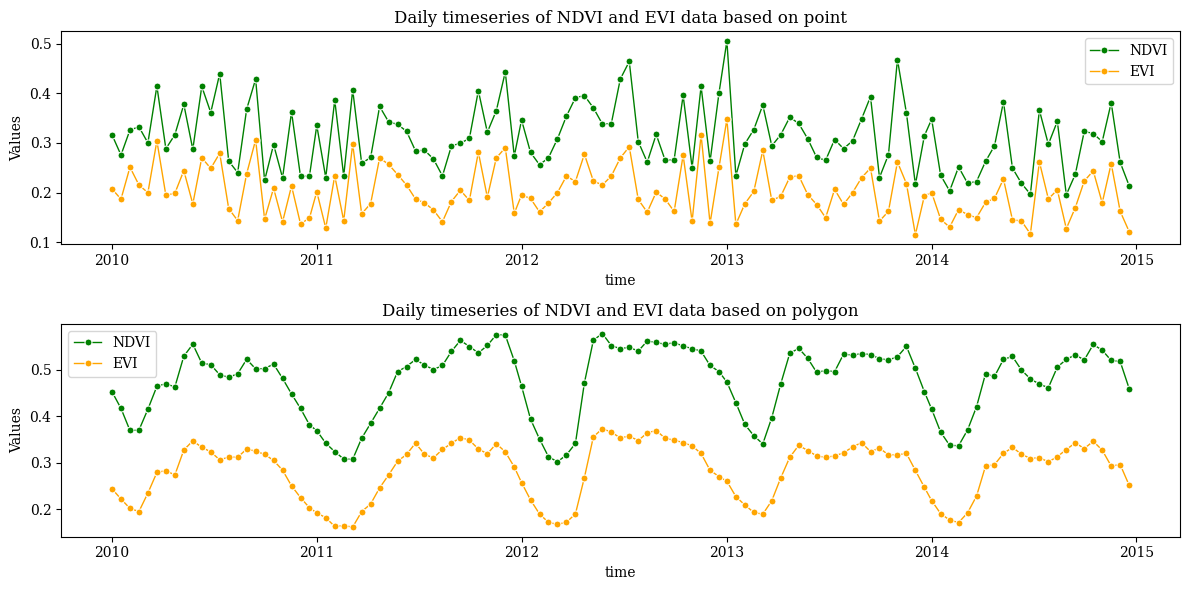

In [48]:
# Plot the data
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
axes = axes.flatten()

sns.lineplot(
    data=modis_ndvi_point_ts,
    x="time",
    y="NDVI",
    c="green",
    marker="o",
    markersize=5,
    linewidth=1,
    ax=axes[0],
    label="NDVI",
)
sns.lineplot(
    data=modis_ndvi_point_ts,
    x="time",
    y="EVI",
    c="orange",
    marker="o",
    markersize=5,
    linewidth=1,
    ax=axes[0],
    label="EVI",
)
axes[0].set_ylabel("Values")
axes[0].legend()
axes[0].set_title("Daily timeseries of NDVI and EVI data based on point")

sns.lineplot(
    data=modis_ndvi_polygon_ts,
    x="time",
    y="NDVI",
    c="green",
    marker="o",
    markersize=5,
    linewidth=1,
    ax=axes[1],
    label="NDVI",
)
sns.lineplot(
    data=modis_ndvi_polygon_ts,
    x="time",
    y="EVI",
    c="orange",
    marker="o",
    markersize=5,
    linewidth=1,
    ax=axes[1],
    label="EVI",
)
axes[1].set_ylabel("Values")
axes[1].legend()
axes[1].set_title("Daily timeseries of NDVI and EVI data based on polygon")

plt.tight_layout()
plt.show()